In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
today = date.today()

In [2]:
# Get the NASDAQ data
nasdaq = yf.Ticker("^IXIC")

# Get the historical market data
historical_data = nasdaq.history(period="5000d")

# Print the first five rows of the data
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-04-14 00:00:00-04:00,1361.349976,1386.500000,1359.319946,1384.949951,1173640000,0,0
2003-04-15 00:00:00-04:00,1381.670044,1394.030029,1376.030029,1391.010010,1295900000,0,0
2003-04-16 00:00:00-04:00,1411.699951,1418.520020,1391.989990,1394.719971,1551600000,0,0
2003-04-17 00:00:00-04:00,1395.619995,1425.500000,1393.130005,1425.500000,1644000000,0,0
2003-04-21 00:00:00-04:00,1425.959961,1432.079956,1413.709961,1424.369995,1271170000,0,0


In [3]:
# geting the number of rows and column in the data set
historical_data.shape

(5000, 7)

In [4]:
# checking for missing values
historical_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### To reorders the columns of the DataFrame and reset the index to a sequential order, which may be useful for subsequent data analysis tasks. Aswell, this will drop the irelevant features like Dividends and stock splits

In [5]:
historical_data["Date"] = historical_data.index
historical_data = historical_data[["Date", "Open", "High", "Low", "Close", "Volume"]]
historical_data.reset_index(drop=True, inplace=False)

# Show the dataframe
historical_data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2003-04-14 00:00:00-04:00,2003-04-14 00:00:00-04:00,1361.349976,1386.500000,1359.319946,1384.949951,1173640000
2003-04-15 00:00:00-04:00,2003-04-15 00:00:00-04:00,1381.670044,1394.030029,1376.030029,1391.010010,1295900000
2003-04-16 00:00:00-04:00,2003-04-16 00:00:00-04:00,1411.699951,1418.520020,1391.989990,1394.719971,1551600000
2003-04-17 00:00:00-04:00,2003-04-17 00:00:00-04:00,1395.619995,1425.500000,1393.130005,1425.500000,1644000000
2003-04-21 00:00:00-04:00,2003-04-21 00:00:00-04:00,1425.959961,1432.079956,1413.709961,1424.369995,1271170000


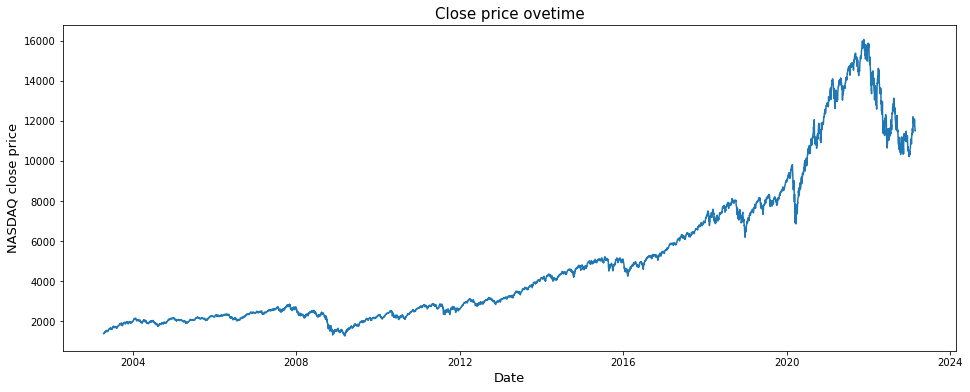

In [6]:
# visualise the closing price overtime
plt.figure(figsize=(16,6))
plt.title('Close price ovetime', fontsize=15)
plt.plot(historical_data['Close'])
plt.xlabel('Date', fontsize=13)
plt.ylabel('NASDAQ close price', fontsize=13)
plt.show()

In [7]:
# checking for the correlation
correlation = historical_data.corr()
correlation["Close"].sort_values(ascending=False)

Close     1.000000
Low       0.999911
High      0.999897
Open      0.999810
Volume    0.770441
Name: Close, dtype: float64

In [8]:
# Training the model
x = historical_data[["Open", "High", "Low", "Volume"]]
y = historical_data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x

array([[1.36134998e+03, 1.38650000e+03, 1.35931995e+03, 1.17364000e+09],
       [1.38167004e+03, 1.39403003e+03, 1.37603003e+03, 1.29590000e+09],
       [1.41169995e+03, 1.41852002e+03, 1.39198999e+03, 1.55160000e+09],
       ...,
       [1.17775000e+04, 1.18032197e+04, 1.16732100e+04, 4.92523000e+09],
       [1.16403701e+04, 1.16841396e+04, 1.14911797e+04, 5.00254000e+09],
       [1.16404004e+04, 1.15705000e+04, 1.14451738e+04, 1.62538100e+09]])

In [10]:
y

array([[ 1384.94995117],
       [ 1391.01000977],
       [ 1394.7199707 ],
       ...,
       [11787.26953125],
       [11492.29980469],
       [11502.84570312]])

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'keras'